# Perceptron Binary Classification:
## Cross Validation (misterious data)

Import and visualize data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("misterious_data.txt")
X = data[:, 1:]
y = np.where(data[:, 0] == 2, 0, data[:, 0])

In [3]:
X.shape, y.shape

((528, 153), (528,))

In [4]:
from sklearn.decomposition import PCA

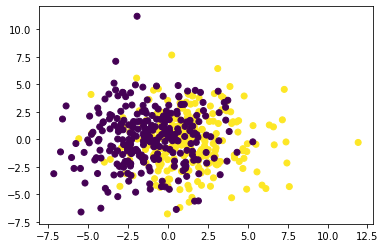

In [5]:
pca = PCA(svd_solver='full')
X_new = pca.fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.show()

#### Batch Gradient Descent
With step activation function

In [6]:
from Perceptron import Perceptron

Naive use of testing with single random test set.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
P = Perceptron(alpha=0.00001)

In [10]:
P.fit(X_train, y_train)

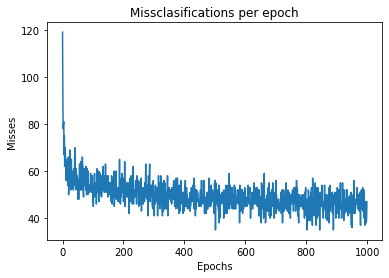

In [11]:
plt.plot(P.misses)
plt.title("Missclasifications per epoch")
plt.xlabel("Epochs")
plt.ylabel("Misses")
plt.show()

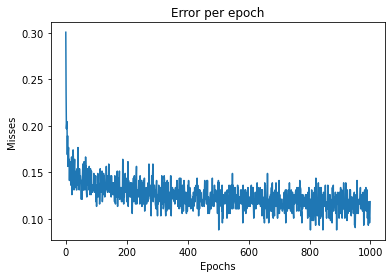

In [27]:
errs = list(map(lambda x: x / y_train.shape[0], P.misses))

plt.plot(errs)
plt.title("Error per epoch")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [14]:
P.score(X_test, y_test)

0.32575757575757575

Correct classifications in yellow.

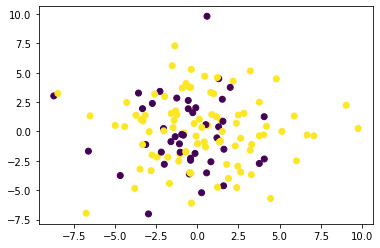

In [47]:
y_pred = P.predict(X_test)
X_test_new = pca.fit_transform(X_test)
plt.scatter(X_test_new[:, 0], X_test_new[:, 1], c=y_test==y_pred)
plt.show()

In [44]:
def decision_boundary(X, y, theta):
    
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Perceptron Decision Boundary")
    plt.plot(x1, x2, 'y-')

##### Hipothesis
Heavily skewed towards the side, possible influenced by outliers and taking advantage of classifying one class correctly.

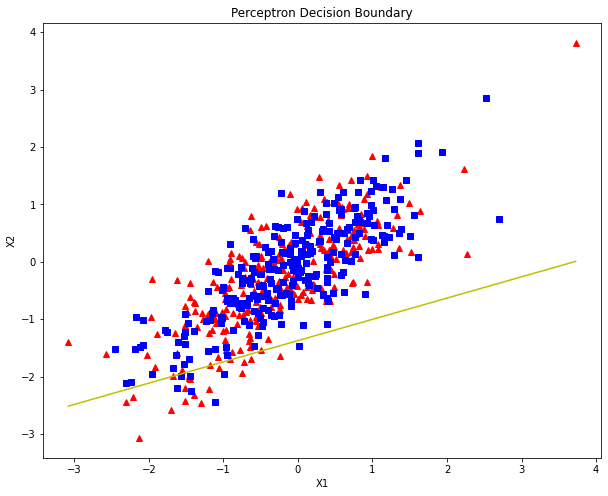

In [48]:
decision_boundary(X, y, P.weights)

Class frequencies for original test set.

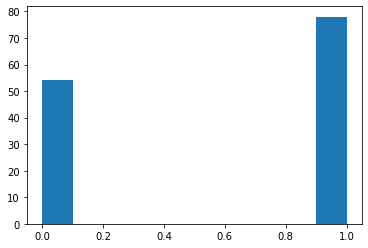

In [52]:
plt.hist(y_test)
plt.show()

Correct classifications for each class.

In [63]:
classes = list(set(y_test))
preds = y_test == y_pred

correct = []
incorrect = []

for c in classes:
    right = 0
    wrong = 0
    for index, pred in enumerate(preds):
        if y_test[index] == c:
            #Compute if right or wrong
            if pred:
                right += 1
            else:
                wrong += 1
                
    correct.append(right)
    incorrect.append(wrong)

<BarContainer object of 2 artists>

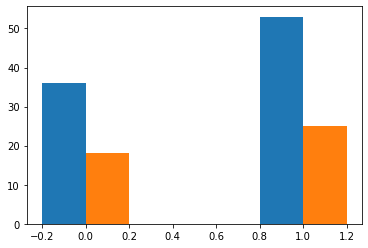

In [75]:
width = 0.20
x = np.arange(len(classes))
plt.bar(x-0.1, correct, width)
plt.bar(x+0.1, incorrect, width)

To this point is possible to note the perceptron model may not be sufficient, or that a linear activation function or step function may be unable to detect patterns hidden in the data. It is also shown that the performance of the classifier is far worse for the test set than for the last iteration of training. This implies that the model has little interpretability and is not very sparse, element which is attempted to be shown in the following plot.

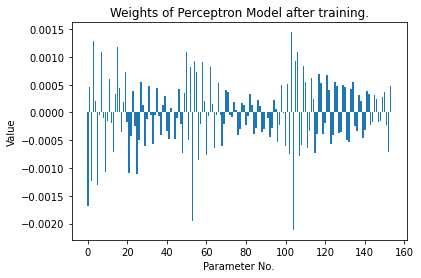

In [36]:
plt.bar([*range(P.weights.shape[0])],np.squeeze(P.weights))
plt.title("Weights of Perceptron Model after training.")
plt.xlabel("Parameter No.")
plt.ylabel("Value")
plt.show()

It can be simply observed that almost every parameter has a relevant weight for the model, which means that the model is not the best at explaining why it classifies samples as it does. An explicable model could say something like "x5, x22 and x121 weights have very significant values with respect to others, so those explain your model".

Now, let's attempt variation with the introduction of mini-batch gradient descent and other activation functions as well as the update rules that come with them.